# Unit 5 - Financial Planning

In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc= 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [10]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['USD']['price']
btc_price


41801.0

In [9]:
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
eth_price

3208.79

In [11]:

# Compute current value of my crpto
btc_value = btc_price * my_btc
eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")



The current value of your 1.2 BTC is $50161.20
The current value of your 5.3 ETH is $17006.59


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [13]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>
PK3QYQJE9WM3HWVESZUY
R4ESp7mlj759zSKdnjMRjDeMm3aa0cauWNjVAjuJ


In [14]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [27]:
# Format current date as ISO format
today = pd.Timestamp("2021-10-31", tz="America/New_York").isoformat()
#end_date = pd.Timestamp("2021-08-26", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = '1D'

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    end=today,
    limit=1000
    
).df

# Preview DataFrame
df_portfolio.tail()

AGG                                       \
                             open     high      low   close     volume   
time                                                                     
2021-10-25 00:00:00-04:00  114.06  114.270  114.060  114.17  7088133.0   
2021-10-26 00:00:00-04:00  114.25  114.380  114.110  114.37  5284755.0   
2021-10-27 00:00:00-04:00  114.66  114.915  114.425  114.77  6754544.0   
2021-10-28 00:00:00-04:00  114.71  114.825  114.570  114.65  4971007.0   
2021-10-29 00:00:00-04:00  114.35  114.780  114.350  114.62  7051614.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2021-10-25 00:00:00-04:00  454.28  455.90  452.39  455.48  37918548.0  
2021-10-26 00:00:00-04:00  457.20  458.49  455.56  455.97  49865704.0  
2021-10-27 00:00:00-04:00  456.45  457.16  453.86  453.92  48105590.0  
2021-10-28 00:00:00-04:00  455.46  458.40  455.45  458.27  43081788.0  
2021-10-29 00:00:00-04:00  455.87  459.56  455.56  459.22  58813207.0

In [31]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio['AGG']['close'][-1]
spy_close_price = df_portfolio['SPY']['close'][-1]


459.22

In [32]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.62
Current SPY closing price: $459.22


In [36]:
# Compute the current value of shares
# client's current amount of shares
my_agg = 200
my_spy = 50

my_agg_value = my_agg * agg_close_price
print(my_agg_value)
my_spy_value = my_spy * spy_close_price
print(my_spy_value)

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

22924.0
22961.0
The current value of your 50 SPY shares is $22961.00
The current value of your 200 AGG shares is $22924.00


### Savings Health Analysis

In [40]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_amt = btc_value + eth_value
shares_amt = my_agg_value + my_spy_value
print(crypto_amt)
print(shares_amt)


# Create savings DataFrame

df_savings = pd.DataFrame({"amount": [67167.787, 45885.0]}, index=["crypto","shares"])

# Display savings DataFrame
df_savings.head()

67167.787
45885.0


,amount
crypto,67167.787
shares,45885.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

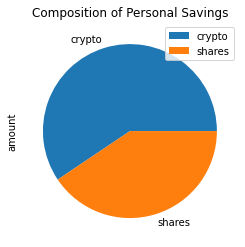

In [45]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [68]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print("Emergency Fund: $" + str(emergency_fund))

# Calculate total amount of savings
total_savings = crypto_amt + shares_amt
print(f"Total Savings: ${total_savings}")



# Validate saving health
if (total_savings > emergency_fund):
    print("Congrats, you have plenty funds in your savings acount")
elif (total_savings == emergency_fund):
    print("You've reached your financial goal for your emergency fund!")
elif (total_savings < emergency_fund):
    deficit = (emergency_fund - total_savings)
    print(f"I'm sorry, you still need ${deficit} to reach your emergency funds goal of ${emergency_fund}.")


Emergency Fund: $36000
Total Savings: $113052.787
Congrats, you have plenty funds in your savings acount


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [70]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-01-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-12-30', tz='America/New_York').isoformat()

In [74]:
# Get 5 years' worth of historical data for SPY and AGG
# Set tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = '1D'

#close price from 5 years ago till today
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df

# Display sample data
df_stock_data.tail(1)

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-12-30 00:00:00-05:00  113.99  114.13  113.83  114.12  5044053  477.93   

                                                            
                            high     low   close    volume  
time                                                        
2021-12-30 00:00:00-05:00  479.0  475.67  476.15  44681636

In [75]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_bonds = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [76]:
# Printing the simulation input data
MC_stock_bonds.portfolio_data.head(10)

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2021-08-10 00:00:00-04:00  115.65  115.6500  115.4350  115.440  6692325   
2021-08-11 00:00:00-04:00  115.46  115.7000  115.3400  115.550  6423130   
2021-08-12 00:00:00-04:00  115.49  115.5799  115.4000  115.540  4248390   
2021-08-13 00:00:00-04:00  115.65  115.9700  115.6401  115.970  4455924   
2021-08-16 00:00:00-04:00  116.14  116.2700  116.0300  116.030  3406963   
2021-08-17 00:00:00-04:00  115.98  116.0900  115.9300  115.950  4493522   
2021-08-18 00:00:00-04:00  115.94  116.0300  115.8000  115.960  3840678   
2021-08-19 00:00:00-04:00  116.12  116.1550  116.0200  116.140  4314380   
2021-08-20 00:00:00-04:00  116.18  116.2100  116.0800  116.150  2672679   
2021-08-23 00:00:00-04:00  116.09  116.1800  116.0400  116.175  5580303   

                                           SPY                              \
                          daily_return    open      high       low   close   
time                                                                         
2021-08-10 00:00:00-04:00          NaN  442.61  443.4400  441.8800  442.66   
2021-08-11 00:00:00-04:00     0.000953  443.80  443.8820  442.6200  443.74   
2021-08-12 00:00:00-04:00    -0.000087  443.62  445.2572  442.6600  445.08   
2021-08-13 00:00:00-04:00     0.003722  445.59  445.9300  445.0700  445.90   
2021-08-16 00:00:00-04:00     0.000517  444.54  447.1100  442.8700  447.02   
2021-08-17 00:00:00-04:00    -0.000689  444.24  444.9600  440.8500  444.06   
2021-08-18 00:00:00-04:00     0.000086  442.96  444.6250  438.9200  439.21   
2021-08-19 00:00:00-04:00     0.001552  436.27  441.1400  436.1200  439.84   
2021-08-20 00:00:00-04:00     0.000086  440.23  443.7100  439.7100  443.33   
2021-08-23 00:00:00-04:00     0.000215  445.16  448.2300  443.4355  447.26   

                                                  
                             volume daily_return  
time                                              
2021-08-10 00:00:00-04:00  39129442          NaN  
2021-08-11 00:00:00-04:00  35841235     0.002440  
2021-08-12 00:00:00-04:00  34892086     0.003020  
2021-08-13 00:00:00-04:00  32338962     0.001842  
2021-08-16 00:00:00-04:00  52706914     0.002512  
2021-08-17 00:00:00-04:00  84161406    -0.006622  
2021-08-18 00:00:00-04:00  70093163    -0.010922  
2021-08-19 00:00:00-04:00  84838725     0.001434  
2021-08-20 00:00:00-04:00  63120064     0.007935  
2021-08-23 00:00:00-04:00  49349485     0.008865

In [77]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_bonds.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002641,1.003466,1.005102,0.999348,1.001912,1.001027,1.002997,0.996574,0.994230,1.003873,...,1.002541,0.999801,1.005913,0.998849,1.007045,1.001925,0.995266,0.997284,1.001715,0.996076
2,1.000977,1.000196,1.007459,0.993016,0.998033,1.000789,1.010390,0.996035,0.993332,1.017661,...,1.004313,0.986919,1.013252,1.008716,0.999685,1.004325,0.998840,0.998154,0.997008,1.009497
3,1.005493,1.002918,1.012240,0.991326,0.997372,0.995881,1.012228,0.992716,1.004107,1.016482,...,0.993595,0.986533,1.014034,1.012739,0.989897,0.999391,0.999042,1.001262,0.997333,1.016242
4,1.006647,0.996050,1.023522,0.989061,0.990874,1.007163,1.015750,0.996595,1.003245,1.005110,...,0.994118,0.991601,1.015067,1.014591,0.975105,1.000391,1.006156,1.004796,1.000675,1.018502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.907295,50.715704,40.801798,17.866640,24.961236,15.541465,29.545852,18.081794,15.306719,45.561693,...,20.598385,14.475318,20.781306,19.152220,14.386943,27.934497,7.821992,23.526211,23.795973,12.588138
7557,9.794075,50.848496,40.648978,17.791832,25.098891,15.478452,29.718568,18.048501,15.324073,45.583595,...,20.595949,14.465545,20.733758,19.063094,14.517358,27.852309,7.798845,23.652228,23.821830,12.635484
7558,9.800441,50.562150,40.680282,17.748050,24.977129,15.405972,29.808149,18.074542,15.289219,45.662915,...,20.580417,14.573532,20.649431,18.903083,14.460732,27.785100,7.823436,23.633889,23.909081,12.627263
7559,9.837890,50.708167,40.647815,17.898626,24.928753,15.438998,29.652001,17.939323,15.360632,45.149167,...,20.365643,14.562552,20.540002,18.933884,14.352939,27.854157,7.797268,23.667849,24.055136,12.658808


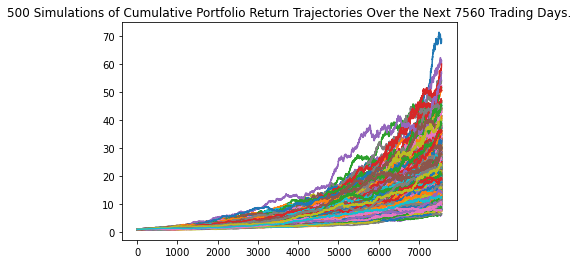

In [78]:
# Plot simulation outcomes
line_plot = MC_stock_bonds.plot_simulation()

line_plot.get_figure().savefig("title.png", bbox_inches="tight")

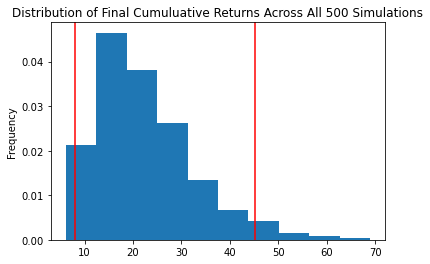

In [79]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stock_bonds.plot_distribution()

### Retirement Analysis

In [80]:
# Fetch summary statistics from the Monte Carlo simulation results
weighted_summary = MC_stock_bonds.summarize_cumulative_return()

# Print summary statistics
print(weighted_summary)

count           500.000000
mean             22.363455
std              10.138086
min               6.133008
25%              14.732561
50%              20.352267
75%              27.774481
max              68.932526
95% CI Lower      8.075439
95% CI Upper     45.218707
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [81]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(weighted_summary[8]*20000,2)
ci_upper = round(weighted_summary[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $161508.78 and $904374.14


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [84]:
# Set initial investment
initial_investment = 20000 * 1.5
print(f"Initial Investment: ${initial_investment}")


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(weighted_summary[8]*30000,2)
ci_upper = round(weighted_summary[9]*30000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

Initial Investment: $30000.0
There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $242263.17 and $1356561.21


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [98]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_hi_risk = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.20,0.80],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_hi_risk.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-08-10 00:00:00-04:00  115.65  115.6500  115.4350  115.44  6692325   
2021-08-11 00:00:00-04:00  115.46  115.7000  115.3400  115.55  6423130   
2021-08-12 00:00:00-04:00  115.49  115.5799  115.4000  115.54  4248390   
2021-08-13 00:00:00-04:00  115.65  115.9700  115.6401  115.97  4455924   
2021-08-16 00:00:00-04:00  116.14  116.2700  116.0300  116.03  3406963   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2021-08-10 00:00:00-04:00          NaN  442.61  443.4400  441.88  442.66   
2021-08-11 00:00:00-04:00     0.000953  443.80  443.8820  442.62  443.74   
2021-08-12 00:00:00-04:00    -0.000087  443.62  445.2572  442.66  445.08   
2021-08-13 00:00:00-04:00     0.003722  445.59  445.9300  445.07  445.90   
2021-08-16 00:00:00-04:00     0.000517  444.54  447.1100  442.87  447.02   

                                                  
                             volume daily_return  
time                                              
2021-08-10 00:00:00-04:00  39129442          NaN  
2021-08-11 00:00:00-04:00  35841235     0.002440  
2021-08-12 00:00:00-04:00  34892086     0.003020  
2021-08-13 00:00:00-04:00  32338962     0.001842  
2021-08-16 00:00:00-04:00  52706914     0.002512

In [99]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_hi_risk.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004073,1.002766,0.994105,1.005574,1.002617,1.001349,0.999722,0.996288,1.019328,1.013587,...,1.020946,1.002313,1.004433,1.001107,1.002774,0.989452,1.001859,0.998670,1.002689,1.006008
2,1.002908,0.997932,0.988877,1.013046,1.000540,1.012247,0.999620,0.993953,1.023432,1.014143,...,1.018326,0.995636,0.994539,0.995983,1.010175,0.971678,0.989765,1.012454,1.009787,1.004293
3,1.005632,0.998637,1.001834,1.011937,1.005802,1.007059,0.994546,0.981645,1.025787,1.015468,...,1.014997,0.999884,0.983932,0.996828,1.007936,0.973702,0.985912,1.011657,1.012228,1.006082
4,1.003497,0.994534,1.002411,1.011621,1.006889,1.010774,1.005295,0.984225,1.029467,1.016601,...,1.014285,0.997701,0.985006,0.998012,0.993271,0.964653,0.983396,1.005135,1.008382,1.005173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.768751,1.515867,2.385430,1.734798,2.843366,2.051120,2.111074,1.158547,1.657841,2.036522,...,2.499405,1.648053,2.099673,1.898152,1.751863,1.920678,2.052463,2.348876,1.410868,2.544244
1257,2.772105,1.506538,2.400351,1.732657,2.832224,2.035959,2.097932,1.158175,1.683243,2.035588,...,2.511857,1.660916,2.125194,1.904106,1.756962,1.913033,2.058856,2.376199,1.415463,2.554001
1258,2.763457,1.497297,2.428538,1.728857,2.859936,2.041362,2.099928,1.162648,1.689931,2.035035,...,2.537297,1.666845,2.140984,1.890339,1.758264,1.909196,2.061854,2.392264,1.405353,2.557542
1259,2.776238,1.503407,2.417991,1.732358,2.866198,2.027427,2.104717,1.160007,1.702554,2.051357,...,2.553243,1.690566,2.126277,1.860655,1.778278,1.925978,2.073391,2.366217,1.402536,2.559933


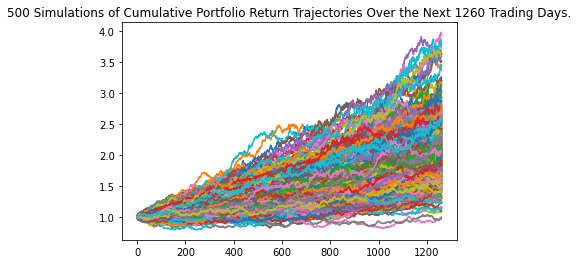

In [102]:
# Plot simulation outcomes
hi_risk_plot = MC_hi_risk.plot_simulation()

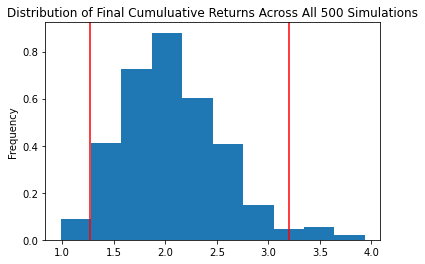

In [103]:
# Plot probability distribution and confidence intervals
risk_dist_plot = MC_hi_risk.plot_distribution()

In [104]:
# Fetch summary statistics from the Monte Carlo simulation results
risk_summary = MC_hi_risk.summarize_cumulative_return()

# Print summary statistics
print(risk_summary)

count           500.000000
mean              2.079928
std               0.494807
min               0.983638
25%               1.730214
50%               2.022857
75%               2.380770
max               3.937480
95% CI Lower      1.273325
95% CI Upper      3.203229
Name: 1260, dtype: float64


In [106]:
# Set initial investment
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5 = round(risk_summary[8]*100000,2)
ci_upper_5 = round(risk_summary[9]*100000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5} and ${ci_upper_5}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 5 years will end within in the range of $127332.54 and $320322.92


### Ten Years Retirement Option

In [107]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.20,0.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_10_year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-08-10 00:00:00-04:00  115.65  115.6500  115.4350  115.44  6692325   
2021-08-11 00:00:00-04:00  115.46  115.7000  115.3400  115.55  6423130   
2021-08-12 00:00:00-04:00  115.49  115.5799  115.4000  115.54  4248390   
2021-08-13 00:00:00-04:00  115.65  115.9700  115.6401  115.97  4455924   
2021-08-16 00:00:00-04:00  116.14  116.2700  116.0300  116.03  3406963   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2021-08-10 00:00:00-04:00          NaN  442.61  443.4400  441.88  442.66   
2021-08-11 00:00:00-04:00     0.000953  443.80  443.8820  442.62  443.74   
2021-08-12 00:00:00-04:00    -0.000087  443.62  445.2572  442.66  445.08   
2021-08-13 00:00:00-04:00     0.003722  445.59  445.9300  445.07  445.90   
2021-08-16 00:00:00-04:00     0.000517  444.54  447.1100  442.87  447.02   

                                                  
                             volume daily_return  
time                                              
2021-08-10 00:00:00-04:00  39129442          NaN  
2021-08-11 00:00:00-04:00  35841235     0.002440  
2021-08-12 00:00:00-04:00  34892086     0.003020  
2021-08-13 00:00:00-04:00  32338962     0.001842  
2021-08-16 00:00:00-04:00  52706914     0.002512

In [108]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994007,1.004972,0.989797,0.997991,1.001447,0.993601,0.993029,0.992291,0.994774,0.999191,...,1.010633,1.003646,0.993372,1.002208,1.001428,0.996272,1.003571,1.000406,0.995633,0.990282
2,0.990905,1.007084,0.992797,1.001087,1.007394,0.987573,0.994274,0.993909,0.999647,1.000956,...,1.001448,1.009515,0.994550,1.008924,0.995619,0.992563,0.999678,0.994265,0.992789,0.992582
3,0.984344,1.008787,0.992227,0.989658,1.016710,0.992306,1.005103,0.998853,0.988521,1.005651,...,0.995034,1.011873,0.989121,1.003391,0.982141,0.995963,0.995833,0.995097,0.992592,0.993137
4,0.995633,1.006592,0.990485,1.000109,1.025780,0.993796,0.996560,0.994365,0.979346,0.994478,...,1.001920,1.014465,0.996897,0.998411,0.982792,0.987590,0.995860,0.982590,0.987284,0.989446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.324470,10.010296,3.247170,5.754690,4.151081,3.231341,2.280423,3.314436,5.430957,3.981983,...,2.853751,3.493309,5.085605,1.603644,6.464680,4.057782,5.192349,3.882095,2.753748,4.898757
2517,6.363573,9.996120,3.254235,5.735600,4.143416,3.254899,2.320586,3.261019,5.408850,3.944894,...,2.846191,3.485076,5.062732,1.612386,6.339074,4.071201,5.181532,3.847350,2.755639,4.861172
2518,6.329742,9.884167,3.234725,5.728563,4.106890,3.268876,2.322606,3.239747,5.332740,3.948984,...,2.841540,3.482138,5.075926,1.615061,6.391500,4.027174,5.133000,3.855623,2.767196,4.837265
2519,6.312807,9.907417,3.204755,5.765313,4.139679,3.308866,2.333469,3.247967,5.299104,3.926020,...,2.850834,3.484660,5.090862,1.609597,6.410156,4.034111,5.121587,3.848151,2.777367,4.846276


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

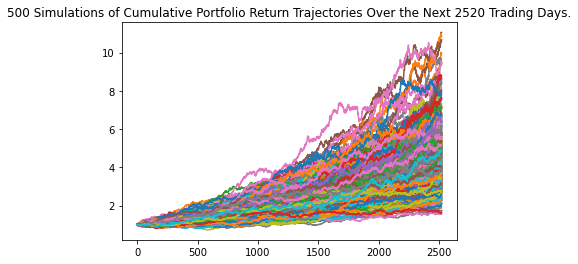

In [109]:
# Plot simulation outcomes
MC_10_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

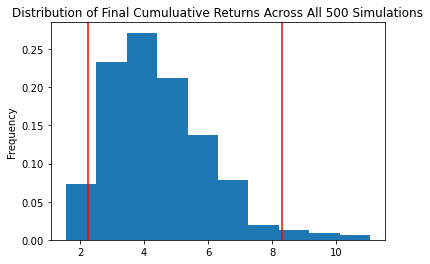

In [111]:
# Plot probability distribution and confidence intervals
MC_10_year.plot_distribution()

In [112]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_10 = MC_10_year.summarize_cumulative_return()

# Print summary statistics
print(summary_10)

count           500.000000
mean              4.446491
std               1.566982
min               1.553586
25%               3.295482
50%               4.170797
75%               5.343464
max              11.052199
95% CI Lower      2.259399
95% CI Upper      8.299615
Name: 2520, dtype: float64


In [115]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_10[8]*20000,2)
ci_upper_ten = round(summary_10[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $45187.97 and $165992.31
